In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [6]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
print(type(X[0]))
print(type(y[0]))

<class 'numpy.ndarray'>
<class 'str'>


In [8]:
y = y.astype(np.uint8)

type(y[0])

numpy.uint8

In [9]:
def visualize_digit(x):
    plt.axis("off")
    plt.imshow(x.reshape((28, 28)), cmap = plt.cm.gray);

Label: 5


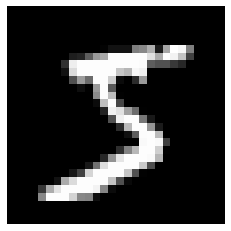

In [10]:
index = 0
sample = (X[index], y[index])

print("Label:", sample[1])
visualize_digit(sample[0])

In [12]:
def plot_distribution(y, name_set):
    digits, counts = np.unique(y, return_counts = True)
    dist_dict = dict(zip(digits, counts))
    
    print(f"Verteilung der Label ({name_set}):")
    print(dist_dict)

    plt.bar(digits, counts, tick_label = digits);

Verteilung der Label (complete set):
{0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


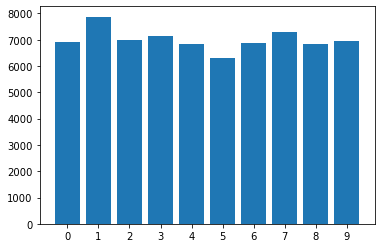

In [13]:
plot_distribution(y, "complete set");

In [14]:
X_train = X[:60000] 
y_train = y[:60000] 

X_val = X[60000:67000]
y_val = y[60000:67000]

X_test = X[67000:]
y_test = y[67000:]

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_train: {X_val.shape}, y_train: {y_val.shape}")
print(f"X_train: {X_test.shape}, y_train: {y_test.shape}")

X_train: (60000, 784), y_train: (60000,)
X_train: (7000, 784), y_train: (7000,)
X_train: (3000, 784), y_train: (3000,)


Verteilung der Label (train):
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


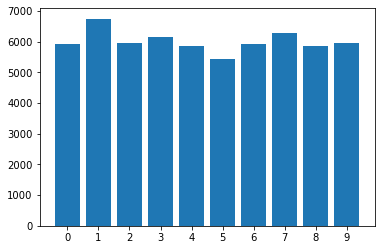

In [15]:
plot_distribution(y_train, "train")

Verteilung der Label (val):
{0: 672, 1: 795, 2: 729, 3: 702, 4: 700, 5: 633, 6: 656, 7: 712, 8: 682, 9: 719}


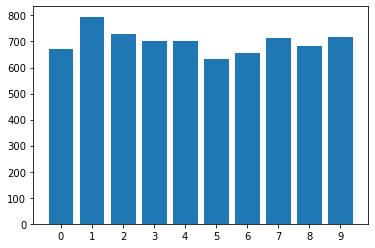

In [16]:
plot_distribution(y_val, "val")

Verteilung der Label (test):
{0: 308, 1: 340, 2: 303, 3: 308, 4: 282, 5: 259, 6: 302, 7: 316, 8: 292, 9: 290}


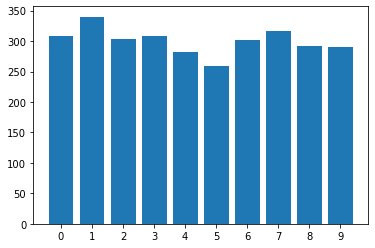

In [17]:
plot_distribution(y_test, "test")

In [18]:
def squared_dist(x: np.array, y: np.array) -> np.float64:
    """takes as input two vector of the same size and returns the euclidean distance between them"""
    return np.sum(np.square(x - y))

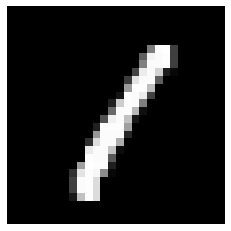

In [19]:
visualize_digit(X_train[3])

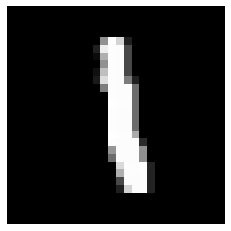

In [20]:
visualize_digit(X_train[6])

In [21]:
eins_zu_eins = squared_dist(X_train[3], X_train[6]) # Abstand zwischen zwei Einsen

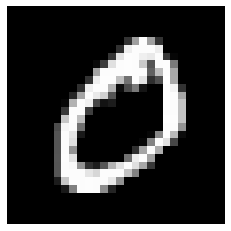

In [22]:
visualize_digit(X_train[1])

In [23]:
eins_zu_null = squared_dist(X_train[3], X_train[1]) # Abstand zwischen einer Eins und einer Null

(array([   15,    29,    38, ..., 59963, 59977, 59988], dtype=int64),)


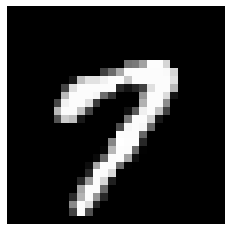

In [24]:
# Lösung

print(np.where(y_train == 7)) # Finde alle Siebener
visualize_digit(X_train[15])

eins_zu_sieben = squared_dist(X_train[3], X_train[15])

In [25]:
print("Abstand von 1 zu 1: ", eins_zu_eins)
print("Abstand von 1 zu 0: ", eins_zu_null)
print("Abstand von 1 zu 7: ", eins_zu_sieben)

Abstand von 1 zu 1:  5542881.0
Abstand von 1 zu 0:  7653668.0
Abstand von 1 zu 7:  5815965.0


In [26]:
def find_nearest_neighbors(x):
    distances = [squared_dist(x, X_train[i]) for i in range(len(y_train))]
    return np.argmin(distances)

In [27]:
def nn_classifier(x):
    idx = find_nearest_neighbors(x)
    return y_train[idx]

Label:  5
Prediction:  5


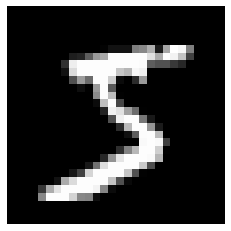

In [28]:
sample_idx = 0

print("Label: ", y_train[sample_idx])
print("Prediction: ", nn_classifier(X_train[sample_idx]))
visualize_digit(X_train[sample_idx])

In [29]:
for i in range(10):
    label = y_train[i]
    pred = nn_classifier(X_train[i])
    if label == pred:
        print(f"Bei index {i} korrekt klassifiziert")
    else: 
        print(f"FEHLER! Bei index {i} falsch klassifiziert")
        break

Bei index 0 korrekt klassifiziert
Bei index 1 korrekt klassifiziert
Bei index 2 korrekt klassifiziert
Bei index 3 korrekt klassifiziert
Bei index 4 korrekt klassifiziert
Bei index 5 korrekt klassifiziert
Bei index 6 korrekt klassifiziert
Bei index 7 korrekt klassifiziert
Bei index 8 korrekt klassifiziert
Bei index 9 korrekt klassifiziert


In [31]:
y_train_8 = (y_train == 8) # True für alle Achter, False für den Rest
y_val_8 = (y_val == 8)
y_test_8 = (y_test == 8)

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(random_state=42)

(array([   17,    31,    41, ..., 59989, 59995, 59999], dtype=int64),)


array([ True])

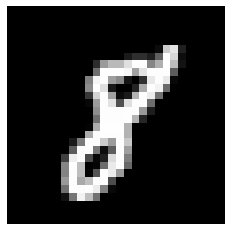

In [33]:
print(np.where(y_train_8 == True)) # Finde alle Achter
visualize_digit(X_train[17])

sgd_clf.predict([X_train[17]])

array([False])

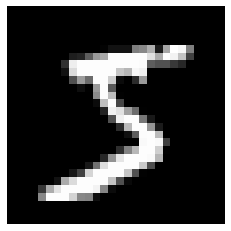

In [34]:
visualize_digit(X_train[0])
sgd_clf.predict([X_train[0]])

In [35]:
from sklearn.metrics import accuracy_score

y_train_preds = sgd_clf.predict(X_train)

accuracy_score(y_train_preds, y_train_8)

0.9446166666666667

In [36]:
y_val_preds = sgd_clf.predict(X_val)

accuracy_score(y_val_preds, y_val_8)

0.9354285714285714

In [37]:
never_8_list = [False for i in range(len(X_train))]
never_8_array = np.array(never_8_list)

print(never_8_array)

[False False False ... False False False]


In [38]:
accuracy_score(never_8_array, y_train_8)

0.9024833333333333

Verteilung der Label (train_8):
{False: 54149, True: 5851}


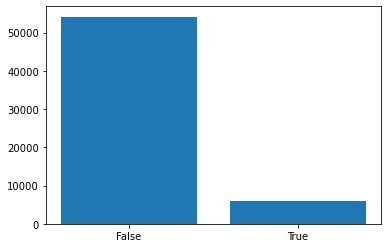

In [39]:
plot_distribution(y_train_8, "train_8")

In [40]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train_8, y_train_preds)
cf_matrix

array([[52977,  1172],
       [ 2151,  3700]], dtype=int64)

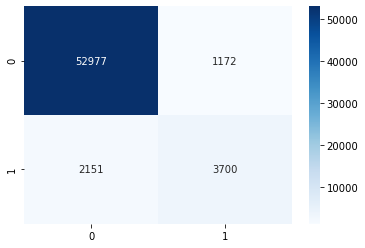

In [46]:
sns.heatmap(cf_matrix, annot = True, fmt = "d", cmap = 'Blues');

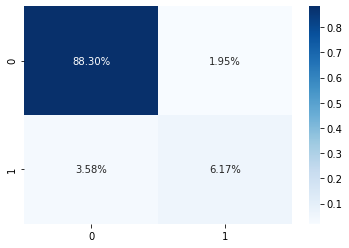

In [88]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues');

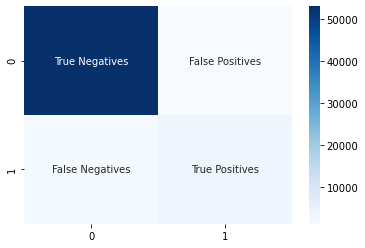

In [93]:
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
labels = np.array(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot = labels, fmt = "", cmap = "Blues");

In [48]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_8, y_train_preds))

print(recall_score(y_train_8, y_train_preds))

0.7594417077175698
0.6323705349512904


In [67]:
true_negs, false_negs = (i for i in cf_matrix[:,0])
false_pos, true_pos = (i for i in cf_matrix[:, 1])

precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_negs)

print(f"precision: TP/(TP+FP) = {true_pos}/({true_pos}+{false_pos}) = {precision}")
print(f"recall: TP/(TP+FN) = {true_pos}/({true_pos}+{false_negs}) = {recall}")

precision: TP/(TP+FP) = 3700/(3700+1172) = 0.7594417077175698
recall: TP/(TP+FN) = 3700/(3700+2151) = 0.6323705349512904


In [66]:
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_preds)

0.6901053809568218

In [69]:
f1 = 2*((precision*recall)/(precision + recall))

print(f"F1-score: {f1}")

F1-score: 0.6901053809568218


In [73]:
y_scores = sgd_clf.decision_function([X[0]])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[-12954.44836362]
[False]


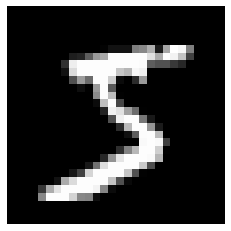

In [78]:
visualize_digit(X[0])

In [83]:
score = sgd_clf.decision_function([X[0]])
print(score)

threshold = 0
print(score > threshold)

[-12954.44836362]
[False]


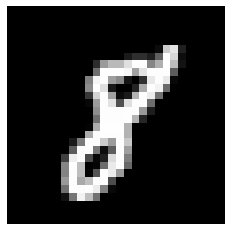

In [80]:
visualize_digit(X[17])

In [84]:
score = sgd_clf.decision_function([X[17]])
print(score)

threshold = 0
print(score > threshold)

[1089.15759949]
[ True]


In [85]:
threshold = 5000
print(score > threshold)

[False]


In [88]:
scores = sgd_clf.decision_function(X_train)

In [89]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_8, scores)

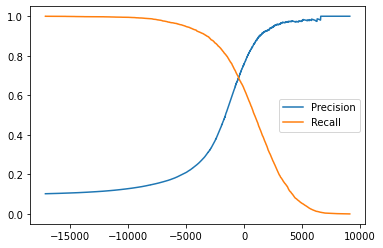

In [99]:
plt.plot(thresholds, precisions[:-1], label = "Precision")
plt.plot(thresholds, recalls[:-1], label = "Recall")
plt.legend();